Since version 0.3, krisk introduced two type of tidy plot: `bar_tidy` and `line_tidy`. The difference between this plot, is that it take away every data manipulation schemes that usually reside in normal plot. In return, tidy plots assume you manipulate the data in your own way. The data must be tidy format, which is famously defined from Hadley Wickham. 

The characteristics of tidy format defined in krisk as follows:

* DataFrame is only 2-dimension. There is no hierarchical columns or index
* Data is cleaned and aggregated
* No duplicate values for each index-column pair

This will make it easier for krisk to identify the axes and series, such that:
* index is used for category x-axis.
* each column corresponds to one series.

Let's take a look at this in more detail.

In [1]:
import krisk.plot as kk
from krisk import init_notebook; init_notebook()

<IPython.core.display.Javascript object>

## Time Series

One example that we can use Time Series data is from Wes Mckinney's Book, [*Python for Data Analysis*](http://shop.oreilly.com/product/0636920023784.do). The following are codes example that used from the GitHub repo [here](https://github.com/wesm/pydata-book/blob/master/ch10.ipynb#Time-series-plotting).

In [1]:
%matplotlib inline
import pandas as pd

In the notebook, Wes showed an example of using time series plotting using stock data.

In [2]:
close_px_all = pd.read_csv('https://raw.githubusercontent.com/wesm/pydata-book/master/ch09/stock_px.csv',
                           parse_dates=True, index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B').ffill()

In [3]:
close_px.head()

AAPL   MSFT    XOM
2003-01-02  7.40  21.11  29.22
2003-01-03  7.45  21.14  29.24
2003-01-06  7.45  21.52  29.96
2003-01-07  7.43  21.93  28.95
2003-01-08  7.28  21.31  28.83

This is the plot looks like,

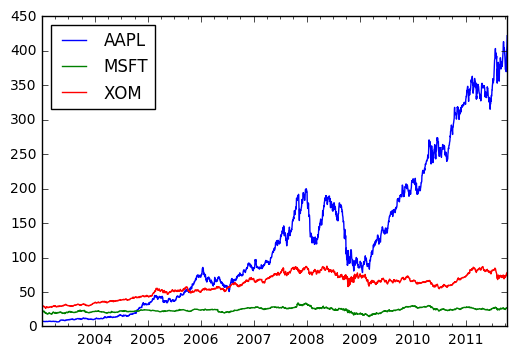

In [11]:
close_px.plot()

And here is what krisk `line_tidy` plot does instead.

In [7]:
kk.line_tidy(close_px)

With this basic plot, you can hover horizontally to see values each line, and use the legend to control enable/disable  line.

This is is only single `pd.Series` looks like in plotting.

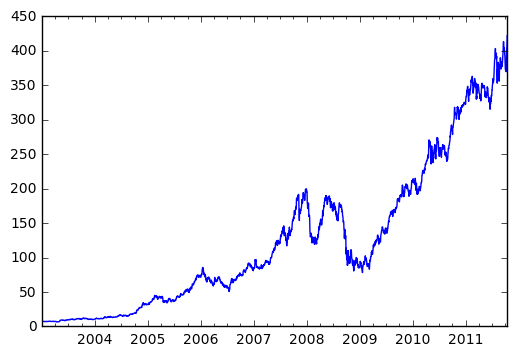

In [12]:
close_px['AAPL'].plot()

And this is what krisk `line_tidy` plot looks like.

In [9]:
kk.line_tidy(close_px['AAPL'])

Of course there's more. Like `line` krisk plot, aside from data manipulation parameters, you can use stacked area charts as follows.

In [10]:
kk.line_tidy(close_px, area=True, stacked=True)

Or using full stacked area chart. Note that using `full` will eventually manipulate the data you own so it normalize to 1.

In [8]:
kk.line_tidy(close_px, area=True, stacked=True, full=True)

`bar_tidy` plot also can be used like `line_tidy` plot.

In [11]:
gapminder =  (pd.read_csv('http://www.stat.ubc.ca/~jenny/notOcto/STAT545A/'
                              'examples/gapminder/data/'
                              'gapminderDataFiveYear.txt', sep='\t')
              .pivot_table(values='lifeExp', index='year', columns='continent', aggfunc='mean'))

In [29]:
gapminder.head()

continent     Africa  Americas       Asia     Europe  Oceania
year                                                         
1952       39.135500  53.27984  46.314394  64.408500   69.255
1957       41.266346  55.96028  49.318544  66.703067   70.295
1962       43.319442  58.39876  51.563223  68.539233   71.085
1967       45.334538  60.41092  54.663640  69.737600   71.310
1972       47.450942  62.39492  57.319269  70.775033   71.910

In [12]:
kk.bar_tidy(gapminder)

In [13]:
kk.bar_tidy(gapminder, stacked=True, trendline=True, annotate=True)